Cel: wykrycie sytuacji w której pożar zagraża ludziom

Stakeholder: straż pożarna pracująca nad systemem wczesnego ostrzegania oraz

reagowania na zagrożenia pożarowe

In [4]:
import urllib.request
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import json
from scipy import stats
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

In [5]:
data_raw = pd.read_csv('Fire-Incidents.csv')

In [6]:
data_raw.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [8]:
clean_data = pd.read_excel('clean_data.xlsx')

In [9]:
clean_data['Fire_Alarm_System_Impact_on_Evacuation'].unique()

array(['Not applicable: Occupant(s) first alerted by other means',
       'Some persons (at risk) evacuated as a result of hearing fire alarm system',
       'Undetermined',
       'Not applicable: No fire alarm system, no persons present',
       'All persons (at risk of injury) evacuated as a result of hearing fire alarm system',
       'No one (at risk) evacuated as a result of hearing fire alarm system',
       'Fire Alarm system operated but failed to alert occupant(s)'],
      dtype=object)

In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Civilian_Casualties                     11214 non-null  int64         
 1   Count_of_Persons_Rescued                11214 non-null  int64         
 2   Estimated_Dollar_Loss                   11214 non-null  int64         
 3   Estimated_Number_Of_Persons_Displaced   11214 non-null  int64         
 4   Fire_Alarm_System_Impact_on_Evacuation  11214 non-null  object        
 5   Fire_Alarm_System_Operation             11214 non-null  object        
 6   Fire_Alarm_System_Presence              11214 non-null  object        
 7   Fire_Under_Control_Time                 11214 non-null  datetime64[ns]
 8   Ignition_Source                         11214 non-null  object        
 9   Last_TFS_Unit_Clear_Time                11214 non-

In [11]:
fire_alarm_columns = ['Civilian_Casualties', 'Estimated_Dollar_Loss','Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation',
                      'Fire_Alarm_System_Presence','Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type']
data_fire_columns = data_raw[fire_alarm_columns]
data_fire_columns

,Civilian_Casualties,Estimated_Dollar_Loss,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type
0,0,3000,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone)
1,0,50000,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,Not applicable: Alarm operated OR presence/ope...,Interconnected
2,1,1000000,Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone)
3,0,1000000,Undetermined,Fire alarm system operation undetermined,Undetermined,Not applicable: Alarm operated OR presence/ope...,Type undetermined
4,8,125000,Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,Not applicable: Alarm operated OR presence/ope...,Interconnected
...,...,...,...,...,...,...,...
11209,0,0,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone)
11210,0,1000,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,Not applicable: Alarm operated OR presence/ope...,Interconnected
11211,0,0,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,Not applicable: Alarm operated OR presence/ope...,Interconnected
11212,6,100000,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,Not applicable: Alarm operated OR presence/ope...,Battery operated


In [12]:
data_fire_columns['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].unique()

array(['Not applicable: Alarm operated OR presence/operation undetermined',
       'Reason for inoperation undetermined', 'No battery',
       'Other reason', 'Dead battery',
       'Remote from fire – smoke did not reach alarm',
       'Tampered with (vandalism)', 'Unit failure',
       'Improper installation of unit',
       'Electrical line or battery not connected',
       'Separated from fire (e.g. wall, etc)'], dtype=object)

In [13]:
data_fire_columns['Smoke_Alarm_at_Fire_Origin_Alarm_Failure'].value_counts()\
                .head(20)\
                .to_frame(name='Count')\
                .reset_index()\
                .style.background_gradient(cmap='Reds', subset='Count')

,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Count
0,Not applicable: Alarm operated OR presence/operation undetermined,7770
1,Remote from fire – smoke did not reach alarm,1113
2,Reason for inoperation undetermined,618
3,Other reason,604
4,"Separated from fire (e.g. wall, etc)",392
5,No battery,187
6,Unit failure,173
7,Dead battery,151
8,Electrical line or battery not connected,126
9,Improper installation of unit,45


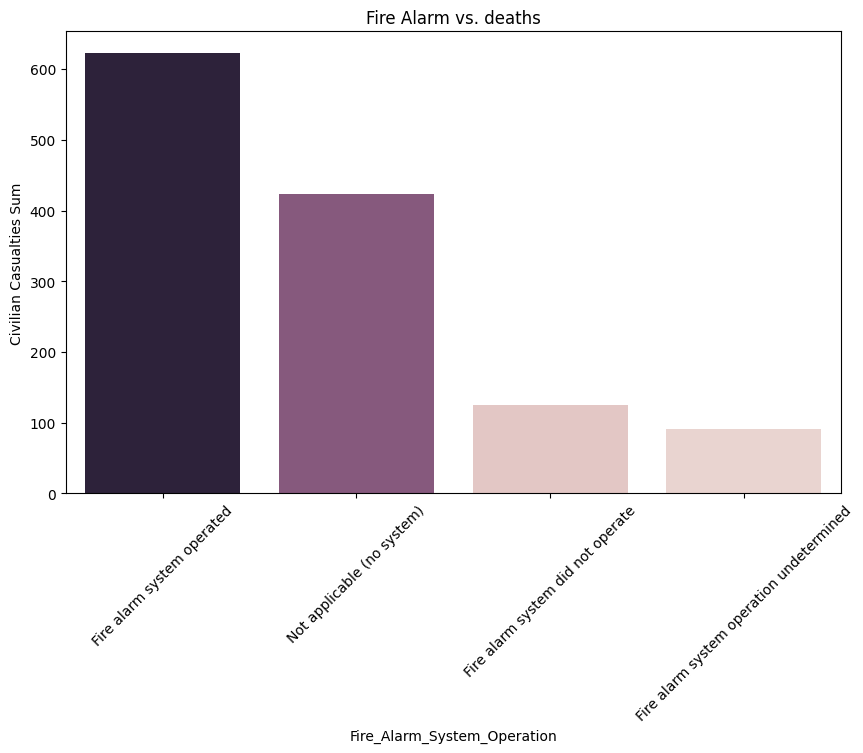

In [14]:
fire_alarm = data_fire_columns.groupby('Fire_Alarm_System_Operation')['Civilian_Casualties'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=fire_alarm.index, y=fire_alarm.values, hue=fire_alarm.values, legend=False)
plt.title('Fire Alarm vs. deaths')
plt.xlabel('Fire_Alarm_System_Operation')
plt.ylabel('Civilian Casualties Sum')
plt.xticks(rotation=45)
plt.show()

In [15]:
selected_columns = ['Civilian_Casualties', 'Fire_Under_Control_Time']
data_for_ts = clean_data[selected_columns]

In [16]:
data_for_ts['Fire_Under_Control_Time'] = data_for_ts['Fire_Under_Control_Time'].dt.to_period("M").dt.to_timestamp()

C:\Users\kotek\AppData\Local\Temp\ipykernel_17724\2597272862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_ts['Fire_Under_Control_Time'] = data_for_ts['Fire_Under_Control_Time'].dt.to_period("M").dt.to_timestamp()


In [17]:
data_for_ts

,Civilian_Casualties,Fire_Under_Control_Time
0,0,2018-08-01
1,0,2018-11-01
2,1,2017-02-01
3,0,2012-10-01
4,8,2018-07-01
...,...,...
11209,0,2018-02-01
11210,0,2018-02-01
11211,0,2018-02-01
11212,6,2018-02-01


In [18]:
import plotly.express as px

sum_casualties = data_for_ts.groupby('Fire_Under_Control_Time')['Civilian_Casualties'].sum().reset_index()

# plotly express do utworzenia wykresu czasowego
fig = px.line(sum_casualties, x = "Fire_Under_Control_Time", y = "Civilian_Casualties")

fig.update_traces(line_color='black', line_width = 3, fillcolor = 'white')
fig.show()